<img src="http://vision.skills.network/logo-light.png" width="400" alt="CV Studio logo"  />


<h2>Image Classification with HOG and SVM</h2>
<h3>Project: Training_an_image_classifier_with_SVM</h3>
<h3>Training Run: Test_IMage</h3>


Now that training is done, you can use your model for predictions. As your recall Support  Vector Machines (SVM) are supervised learning models used for classification. We will be using SVM to classify images.


You will upload your own image and classify using the model from the previous section.


## Objectives


<ul>
    <li>This tool contains the following sections:
        <ul>
            <li>Import Libraries </li>
            <li>Load saved SVM model </li>
            <li>Use the best parameters of <code>C, gamma and the Kernel</code></li>
            <li>Upload your own image and test the model </li>
        </ul>
    </li>
</ul>


***


## Import Important Libraries and Define Auxilary Functions


Libraries for data processing and visualization:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Libraries for image pre-processing and classification:


In [2]:
import cv2
from sklearn.externals import joblib
from skimage.feature import hog

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


Libraries for OS and Cloud:


In [3]:
import os
from skillsnetwork import cvstudio

## Set Up CV Studio Client, Get the Model and Annotations


We will load the model from the training run.


In [4]:
# Initialize the CV Studio Client
cvstudioClient = cvstudio.CVStudio()

Get the annotations from CV Studio:


In [5]:
annotations = cvstudioClient.get_annotations()

Download and load the saved model:


In [ ]:
model_details = cvstudioClient.downloadModel()

In [8]:
pkl_filename = model_details['filename']

In [9]:
svm = joblib.load(pkl_filename) 

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(

## Practice Exercise - Upload Your Image


Upload your image, and see if your image will be correctly classified.

<p><b>Instructions on How to Upload an Image:</b></p>
Use the upload button and upload an image from your local machine:
<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images/instruction.png" width="300"  />
</center>


The image will now be in the directory in which you are working in, to read the image, in a new cell, use the <code>cv2.imread</code> and read its name, for example, I uploaded <code>anothercar.jpg</code> into my current working directory - <code>cv2.imread("anothercar.jpg")</code>.

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images/instruction2.png" width="300"  />
</center>


I have created a function to do it all for you. After importing your image, use the function <code>run_svm</code> to classify the object in your image.


In [10]:
def run_svm(image):
    ## show the original image
    orig_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(orig_image)
    plt.show()
    print('\n')
    ## convert the image into a numpy array
    image = np.array(image).astype('uint8')
    ## resize the image to a size of choice
    image = cv2.resize(image, (64, 64))
    ## convert to grayscale to reduce the information in the picture
    grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ## extract H.O.G features
    hog_features, hog_image = hog(grey_image,
                          visualize=True,
                          block_norm='L2-Hys',
                          pixels_per_cell=(16, 16))
    ## convert the H.O.G features into a numpy array
    image_array = np.array(hog_features)
    ## reshape the array
    image_array = image_array.reshape(1, -1)
    ## make a prediction
    svm_pred = svm.predict(image_array)
    ## print the classifier
    print('Your image was classified as a ' + str(annotations['labels'][int(svm_pred[0])]))    

Now read and classify your image. Replace <code>your_uploaded_file</code> below with the name of your image as seen in your directory.


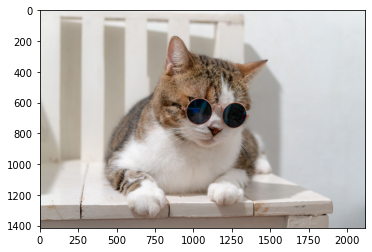



Your image was classified as a cat


In [11]:
## replace "your_uploaded_file" with your file name
my_image = cv2.imread("test_image.jpg")
## run the above function on the image to get a classification
run_svm(my_image)

Copyright © 2021 IBM Corporation. All rights reserved.
